In [1]:
import pde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
import torch
import h5py
import xarray as xr
import multiprocessing as mp
from ks import get_sim
import os
import multiprocessing as mp
print(mp.cpu_count())

/home/chris/anaconda3/envs/pfno/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


12


# Visualize and aggregate

In [20]:
data = xr.open_dataset('../data/KS/ks_data.nc')
data

<xarray.Dataset> Size: 12MB
Dimensions:  (t: 300, x: 256, samples: 20)
Coordinates:
  * t        (t) int64 2kB 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * x        (x) float64 2kB 0.0 0.3922 0.7843 1.176 ... 98.82 99.22 99.61 100.0
Dimensions without coordinates: samples
Data variables:
    u        (samples, t, x) float64 12MB ...

Text(0, 0.5, 't')

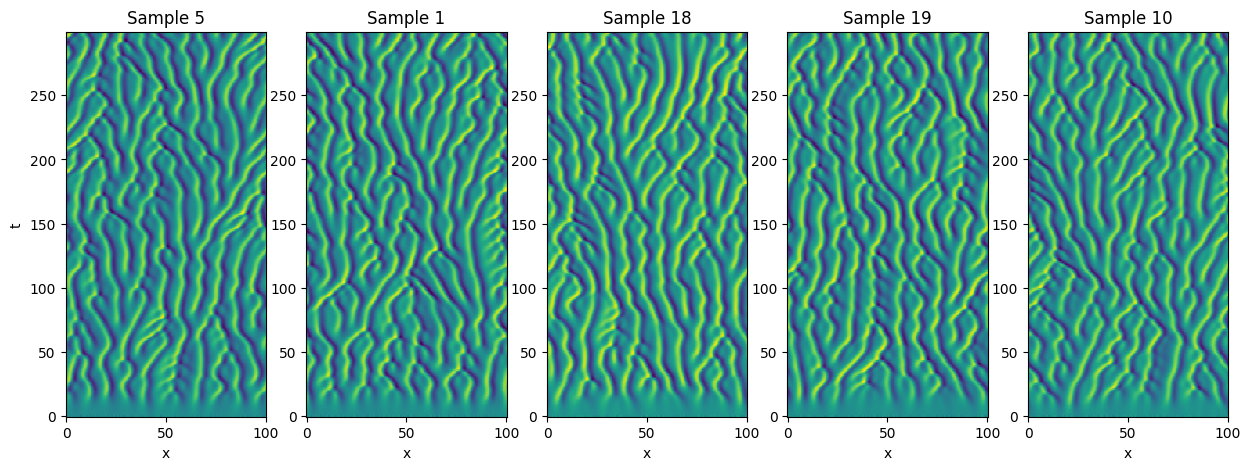

In [21]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
samples = np.random.randint(0, data['u'].shape[0], 5)
t = data.coords["t"].data
x = data.coords["x"].data
for i,s in enumerate(samples):
    axs[i].pcolormesh(x, t, data['u'][s])
    axs[i].set_title(f"Sample {s}")
    axs[i].set_xlabel("x")
axs[0].set_ylabel("t")